In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

Matplotlib is building the font cache; this may take a moment.


In [2]:
three_rates_df = pd.read_csv('NBA 3 Point Rates 2024-2025.csv')
three_rates_df.head()

,Team,3PT_Rate_2025,3PT_Rate_2024,Off_Rtg_2025,Def_Rtg_2025,Net_Rtg_2025,Off_Rtg_2024,3PT_Def_Rate_2025
0,BOS,53.6,47.1,119.5,110.1,9.4,122.2,41.5
1,GSW,46.9,42.5,114.2,111.0,3.2,116.9,41.8
2,BKN,45.8,41.2,108.1,115.4,-7.3,112.4,42.4
3,CLE,45.7,42.2,121.0,111.8,9.2,114.7,41.3
4,CHI,45.7,35.8,113.2,114.8,-1.6,114.0,41.7


In [18]:
atl_test = three_rates_df[three_rates_df['Team'] == 'ATL']
atl_test.head()

,Team,3PT_Rate_2025,3PT_Rate_2024,Off_Rtg_2025,Def_Rtg_2025,Net_Rtg_2025,Off_Rtg_2024,3PT_Def_Rate_2025
18,ATL,41.0,40.8,113.7,114.8,-1.1,116.4,41.9


In [23]:
atl_test['Logo'] = ['ATL']

/var/folders/3b/fsnqd8hj7y74xsbt20zbpdf80000gn/T/ipykernel_44248/2031218394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atl_test['Logo'] = ['ATL']


In [24]:
atl_test.head()

,Team,3PT_Rate_2025,3PT_Rate_2024,Off_Rtg_2025,Def_Rtg_2025,Net_Rtg_2025,Off_Rtg_2024,3PT_Def_Rate_2025,Logo
18,ATL,41.0,40.8,113.7,114.8,-1.1,116.4,41.9,ATL


In [19]:
def getImage(path):
    return OffsetImage(plt.imread(f"../logos/{path}.png"), zoom=.05, alpha = 1)


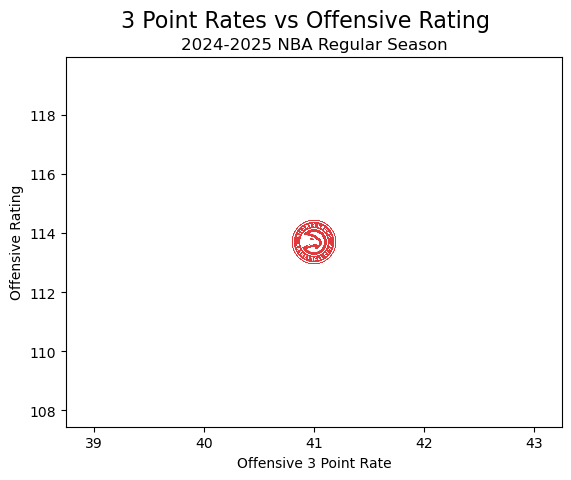

In [ ]:
fig, ax = plt.subplots()

ax.scatter(atl_test['3PT_Rate_2025'], atl_test['Off_Rtg_2025'])

for index, row in atl_test.iterrows():
    ab = AnnotationBbox(getImage(row['Team']), (row['3PT_Rate_2025'], row['Off_Rtg_2025']), frameon=False)
    ax.add_artist(ab)
    

fig.suptitle("3 Point Rates vs Offensive Rating", fontsize=16)

ax.set_title("2024-2025 NBA Regular Season")
ax.set_xlabel('Offensive 3 Point Rate')
ax.set_ylabel('Offensive Rating')

plt.show()

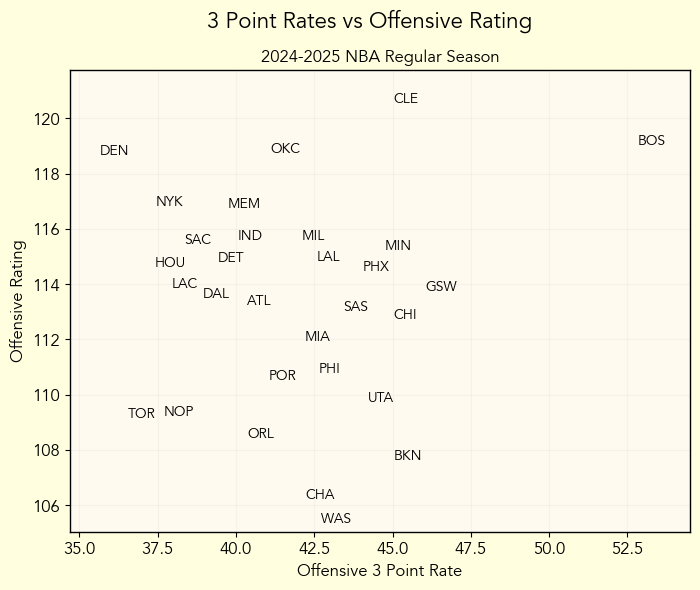

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

x = three_rates_df['3PT_Rate_2025']
y = three_rates_df['Off_Rtg_2025']

ax.scatter(x, y, alpha=0)

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

labels = three_rates_df['Team']
texts = []
for i, label in enumerate(labels):
    texts.append(ax.text(x[i], y[i], label, ha='center', va='center', fontsize=10))
    #plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

fig.suptitle("3 Point Rates vs Offensive Rating", fontsize=16)
ax.set_title("2024-2025 NBA Regular Season")
ax.set_xlabel('Offensive 3 Point Rate')
ax.set_ylabel('Offensive Rating')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()

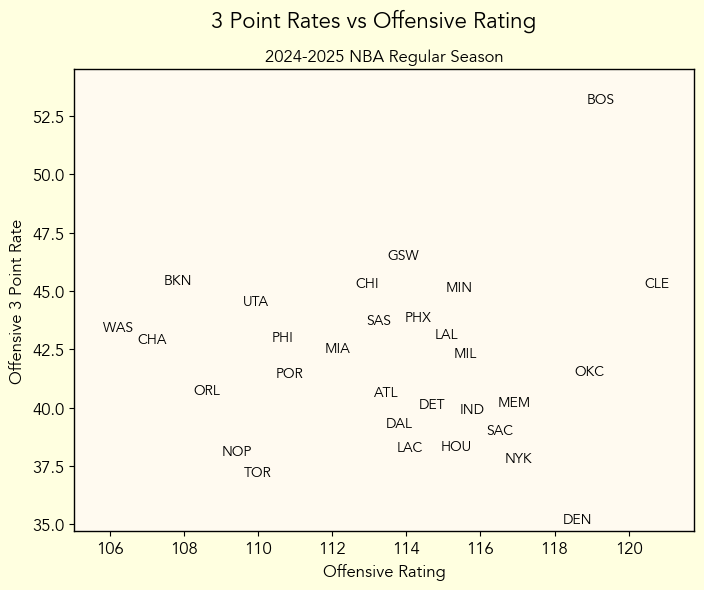

In [78]:
fig, ax = plt.subplots(figsize=(8,6))

y = three_rates_df['3PT_Rate_2025']
x = three_rates_df['Off_Rtg_2025']

ax.scatter(x, y, alpha=0)

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

labels = three_rates_df['Team']
texts = []
for i, label in enumerate(labels):
    texts.append(ax.text(x[i], y[i], label, ha='center', va='center', fontsize=10))
    #plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

fig.suptitle("3 Point Rates vs Offensive Rating", fontsize=16)
ax.set_title("2024-2025 NBA Regular Season")
ax.set_xlabel('Offensive Rating')
ax.set_ylabel('Offensive 3 Point Rate')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()

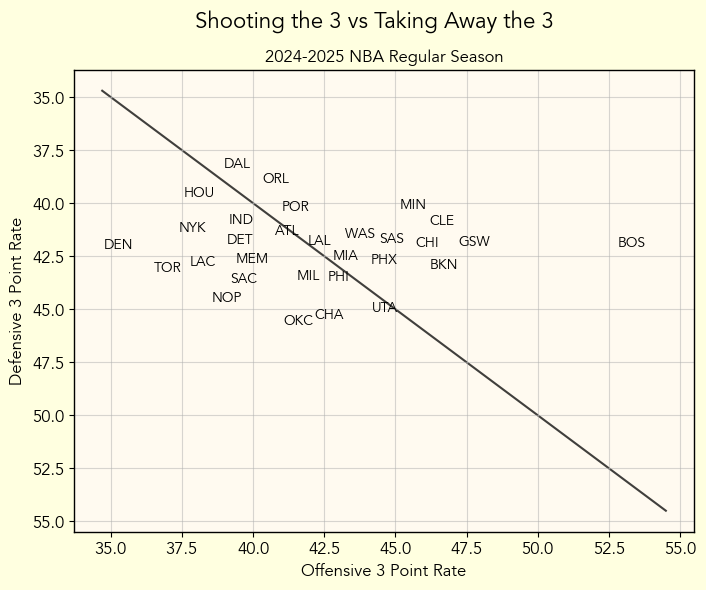

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

x = three_rates_df['3PT_Rate_2025']
y = three_rates_df['3PT_Def_Rate_2025']

ax.scatter(x, y, alpha=0)

#y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

labels = three_rates_df['Team']
texts = []
for i, label in enumerate(labels):
    texts.append(ax.text(x[i], y[i], label, ha='center', va='center', fontsize=10))
    #plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

ax.invert_yaxis()

fig.suptitle("Shooting the 3 vs Taking Away the 3", fontsize=16)
ax.set_title("2024-2025 NBA Regular Season")
ax.set_xlabel('Offensive 3 Point Rate')
ax.set_ylabel('Defensive 3 Point Rate')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()

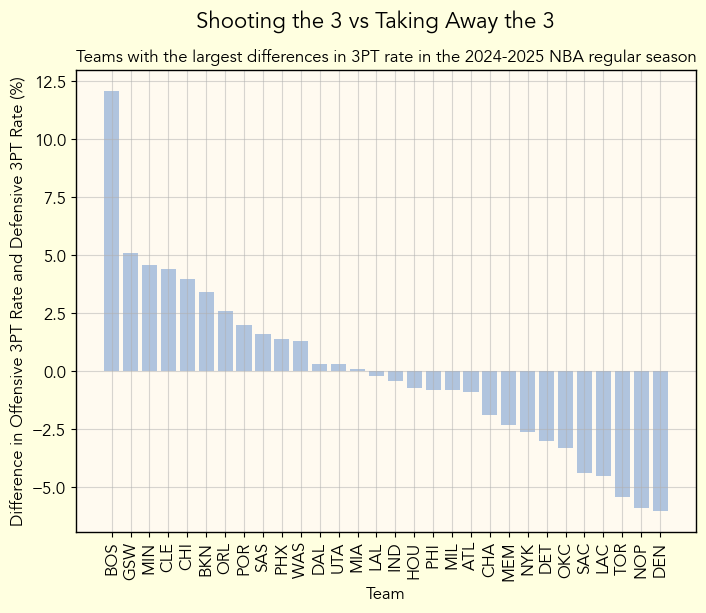

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

three_rates_df['3PT_Rate_Diff_2025'] = three_rates_df['3PT_Rate_2025'] - three_rates_df['3PT_Def_Rate_2025']
sorted_df = three_rates_df.sort_values('3PT_Rate_Diff_2025', ascending=False)

y = sorted_df['3PT_Rate_Diff_2025']
labels = sorted_df['Team']

ax.bar(labels, y, color='lightsteelblue')

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

plt.xticks(rotation=90)
fig.suptitle("Shooting the 3 vs Taking Away the 3", fontsize=16)
ax.set_title("Teams with the largest differences in 3PT rate in the 2024-2025 NBA regular season")
ax.set_ylabel('Difference in Offensive 3PT Rate and Defensive 3PT Rate (%)')
ax.set_xlabel('Team')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()

/var/folders/3b/fsnqd8hj7y74xsbt20zbpdf80000gn/T/ipykernel_2786/2431081051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  between_seasons['25_to_24_diff'] = between_seasons['3PT_Rate_2025'] - between_seasons['3PT_Rate_2024']


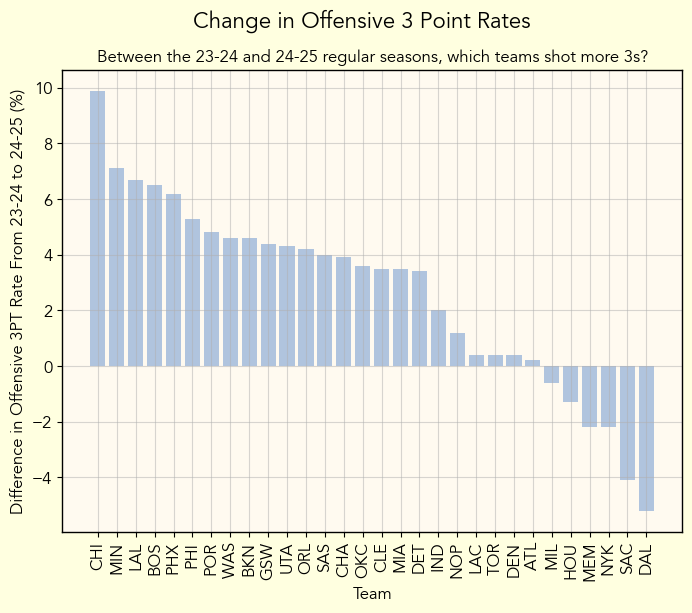

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

between_seasons = three_rates_df[['Team', '3PT_Rate_2025', '3PT_Rate_2024']]
between_seasons['25_to_24_diff'] = between_seasons['3PT_Rate_2025'] - between_seasons['3PT_Rate_2024']
sorted_between_seasons = between_seasons.sort_values('25_to_24_diff', ascending=False)

y = sorted_between_seasons['25_to_24_diff']
labels = sorted_between_seasons['Team']

ax.bar(labels, y, color='lightsteelblue')

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

plt.xticks(rotation=90)
fig.suptitle("Change in Offensive 3 Point Rates", fontsize=16)
ax.set_title("Between the 23-24 and 24-25 regular seasons, which teams shot more 3s?")
ax.set_ylabel('Difference in Offensive 3PT Rate From 23-24 to 24-25 (%)')
ax.set_xlabel('Team')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()

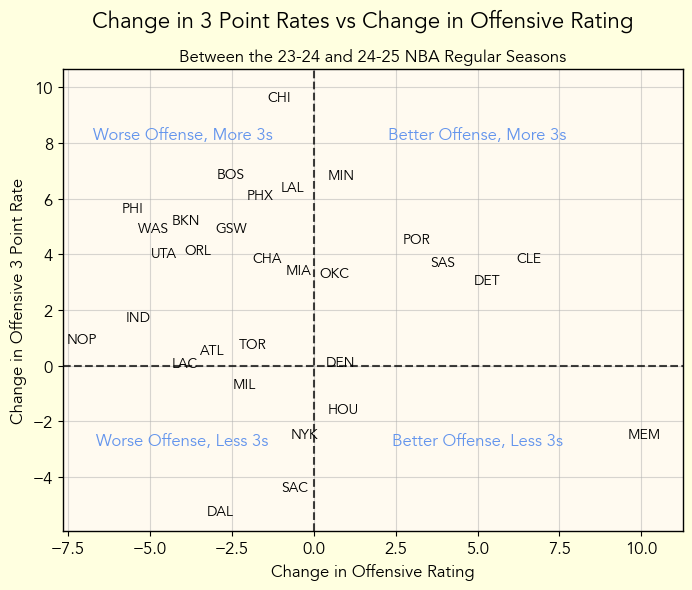

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

y = three_rates_df['3PT_Rate_2025'] - three_rates_df['3PT_Rate_2024']
x = three_rates_df['Off_Rtg_2025'] - three_rates_df['Off_Rtg_2024']

ax.scatter(x, y, alpha=0)
ax.axhline(0, color="black", alpha=0.75, linestyle="--")
ax.axvline(0, color="black", alpha=0.75, linestyle="--")

#texts = []
#for x, y, s in zip(x, y, texts):
#    plt.text(x, y, ha='center', va='center', fontsize=12)
#    texts.append(plt.text(x, y, ha='center', va='center', fontsize=12))

labels = three_rates_df['Team']
texts = []
for i, label in enumerate(labels):
    texts.append(ax.text(x[i], y[i], label, ha='center', va='center', fontsize=10))
    #plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')
    
plt.text(5, -3, 'Better Offense, Less 3s', ha='center', va='bottom', color='cornflowerblue')   
plt.text(5, 8, 'Better Offense, More 3s', ha='center', va='bottom', color='cornflowerblue') 
plt.text(-4, 8, 'Worse Offense, More 3s', ha='center', va='bottom', color='cornflowerblue') 
plt.text(-4, -3, 'Worse Offense, Less 3s', ha='center', va='bottom', color='cornflowerblue') 

fig.suptitle("Change in 3 Point Rates vs Change in Offensive Rating", fontsize=16)
ax.set_title("Between the 23-24 and 24-25 NBA Regular Seasons")
ax.set_xlabel('Change in Offensive Rating')
ax.set_ylabel('Change in Offensive 3 Point Rate')

adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.style.use("../analytics_matplot.mplstyle")
plt.show()